In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np

import matplotlib.pyplot as plt


def weights_init(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)

def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


In [ ]:
#--------------------------------
# Device configuration
#--------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

#--------------------------------
# Hyper-parameters
#--------------------------------
input_size = 3
num_classes = 10
hidden_size = [128, 512, 512, 512, 512]
num_epochs = 20
batch_size = 200
learning_rate = 2e-3
learning_rate_decay = 0.95
reg=0.001
num_training= 49000
num_validation =1000
norm_layer = None #norm_layer = 'BN'
print(hidden_size)


Using device: cuda
[128, 512, 512, 512, 512]


In [ ]:
#-------------------------------------------------
# Load the CIFAR-10 dataset
#-------------------------------------------------
#################################################################################
# TODO: Q3.a Choose the right data augmentation transforms with the right       #
# hyper-parameters and put them in the data_aug_transforms variable             #
#################################################################################
data_aug_transforms = []
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
#data_aug_transforms += [transforms.RandomCrop(32, padding = 4),
#                        transforms.RandomHorizontalFlip()]

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)***** 
norm_transform = transforms.Compose(data_aug_transforms+[transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
cifar_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                           train=True,
                                           transform=norm_transform,
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                          train=False,
                                          transform=test_transform
                                          )


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting datasets/cifar-10-python.tar.gz to datasets/


In [ ]:
#-------------------------------------------------
# Prepare the training and validation splits
#-------------------------------------------------
mask = list(range(num_training))
train_dataset = torch.utils.data.Subset(cifar_dataset, mask)
mask = list(range(num_training, num_training + num_validation))
val_dataset = torch.utils.data.Subset(cifar_dataset, mask)


In [ ]:
#-------------------------------------------------
# Data loader
#-------------------------------------------------
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)



### Question 1

In [ ]:
#-------------------------------------------------
# Convolutional neural network (Q1.a and Q2.a)
# Set norm_layer for different networks whether using batch normalization
#-------------------------------------------------
class ConvNet(nn.Module):
    def __init__(self, input_size, hidden_layers, num_classes, norm_layer=None):
        super(ConvNet, self).__init__()
        #################################################################################
        # TODO: Initialize the modules required to implement the convolutional layer    #
        # described in the exercise.                                                    #
        # For Q1.a make use of conv2d and relu layers from the torch.nn module.         #
        # For Q2.a make use of BatchNorm2d layer from the torch.nn module.              #
        # For Q3.b Use Dropout layer from the torch.nn module.                          #
        #################################################################################
        layers = []
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
            
        # Convolutional layer block 1

        layers.append(nn.Conv2d(input_size, hidden_layers[0], kernel_size = 3, stride = 1, padding =1)),
        layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2)),
        layers.append(nn.ReLU()),

        # Convolution layer block 2 

        layers.append(nn.Conv2d(hidden_layers[0], hidden_layers[1], kernel_size = 3, stride = 1, padding =1)),
        layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2)),
        layers.append(nn.ReLU()),

        # Convolution layer block 3 

        layers.append(nn.Conv2d(hidden_layers[1], hidden_layers[2], kernel_size = 3, stride = 1, padding =1)),
        layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2)),
        layers.append(nn.ReLU()),

        # Convolution layer block 4 

        layers.append(nn.Conv2d(hidden_layers[2], hidden_layers[3], kernel_size = 3, stride = 1, padding =1)),
        layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2)),
        layers.append(nn.ReLU()),

        # Convolution layer block 5

        layers.append(nn.Conv2d(hidden_layers[3], hidden_layers[4], kernel_size = 3, stride = 1, padding =1)),
        layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2))
        layers.append(nn.ReLU()),

        self.conv_layer = nn.Sequential(*layers)
        
        self.Dense = nn.Sequential(
            nn.Linear(512, 10)
        )

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        #################################################################################
        # TODO: Implement the forward pass computations                                 #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fully connected layer
        out = self.Dense(x)


        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out


In [ ]:
#======================================================================================
# Q1.a: Implementing convolutional neural net in PyTorch
#======================================================================================
# In this question we will implement a convolutional neural networks using the PyTorch
# library.  Please complete the code for the ConvNet class evaluating the model
#--------------------------------------------------------------------------------------
model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer).to(device)
# Q2.a - Initialize the model with correct batch norm layer

model.apply(weights_init)
# Print the model
print(model)

ConvNet(
  (conv_layer): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): ReLU()
    (9): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): ReLU()
    (12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): ReLU()
  )
  (Dense): Sequential(
    (0): Linear(in_features=512, out_features=10

In [ ]:
#-------------------------------------------------
# Calculate the model size (Q1.b)
# if disp is true, print the model parameters, otherwise, only return the number of parameters.
#-------------------------------------------------
def PrintModelSize(model, disp=True):
    #################################################################################
    # TODO: Implement the function to count the number of trainable parameters in   #
    # the input model. This useful to track the capacity of the model you are       #
    # training                                                                      #
    #################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    model_sz = print(f"The number of parameters for the described model: {sum(parameter.numel() for parameter in model.parameters())}")


    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return model_sz

In [ ]:
#======================================================================================
# Q1.b: Implementing the function to count the number of trainable parameters in the model
#======================================================================================
PrintModelSize(model)

The number of parameters for the described model: 7682826


In [ ]:
def VisualizeFilter(model):
    #################################################################################
    # TODO: Implement the functiont to visualize the weights in the first conv layer#
    # in the model. Visualize them as a single image of stacked filters.            #
    # You can use matlplotlib.imshow to visualize an image in python                #
    #################################################################################
    # **START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)**
    weight = model.conv_layer[0].weight.cpu().data.numpy()
    filters = np.interp(weight, (weight.min(), weight.max()), (0, 1))

    fig,axs=plt.subplots(8,16, figsize=(20,12),facecolor='black')
    
    axs=axs.ravel()
    for i in range(len(filters)):
        axs[i].imshow((filters[i]*255.0).astype(np.uint8))
    
    pass

In [ ]:
def VisualizeFilter(model):
    #################################################################################
    # TODO: Implement the functiont to visualize the weights in the first conv layer#
    # in the model. Visualize them as a single image of stacked filters.            #
    # You can use matlplotlib.imshow to visualize an image in python                #
    #################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    kernel_map = np.zeros((7*4 + 3, 15*4 + 3, 3))

    kernels = list(model.parameters())[0]
    kernels = kernels.to("cpu")
    kernels = kernels.data.numpy()

    kernels = (kernels - kernels.min()) / (kernels.max() - kernels.min())

    cnt = 0
    for i in range(0, 8*4,4):
      for j in range(0, 16*4, 4):
        kernel_map[i:i+3, j:j+3, :] = kernels[cnt]
        cnt = cnt + 1

    plt.figure(figsize=(20, 10))
    plt.imshow(kernel_map)
    plt.show()

    pass


Bafore training

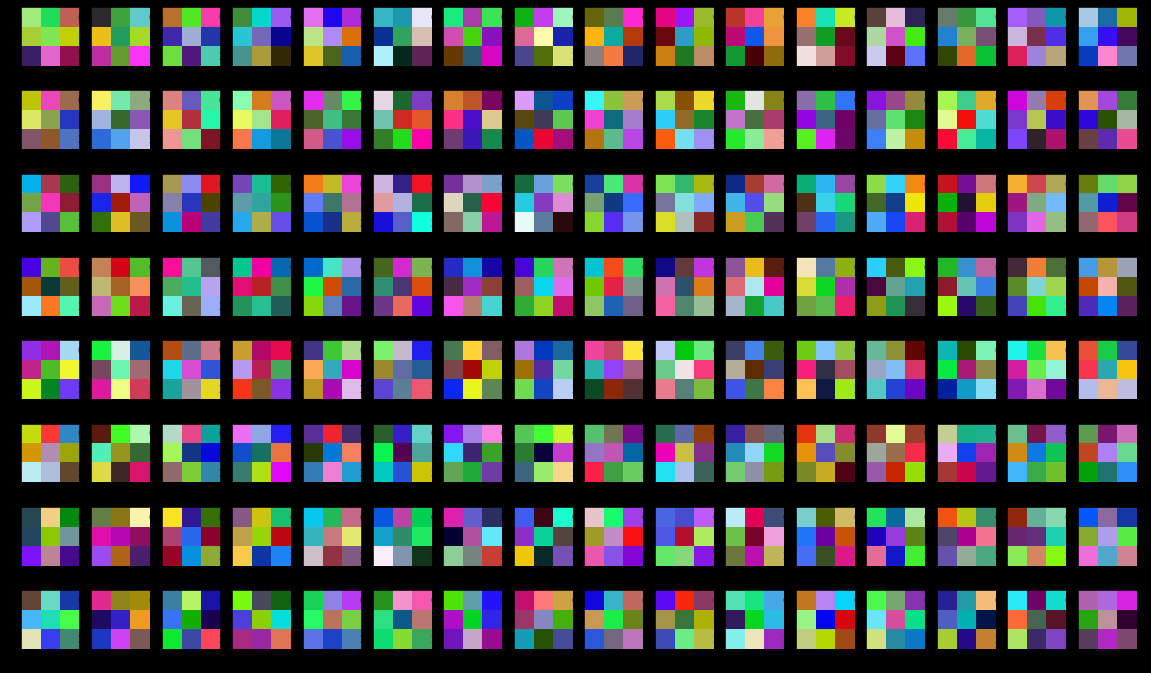

In [ ]:
#======================================================================================
# Q1.a: Implementing the function to visualize the filters in the first conv layers.
# Visualize the filters before training
#======================================================================================
VisualizeFilter(model)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
loss_train = []
loss_val = []
best_accuracy = None
accuracy_val = []
best_model = type(model)(input_size, hidden_size, num_classes, norm_layer=norm_layer) # get a new instance
#best_model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer)
for epoch in range(num_epochs):

    model.train()

    loss_iter = 0
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_iter += loss.item()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
    loss_train.append(loss_iter/(len(train_loader)*batch_size))

    
    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    
        
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        loss_iter = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            loss = criterion(outputs, labels)
            loss_iter += loss.item()
        
        loss_val.append(loss_iter/(len(val_loader)*batch_size))

        accuracy = 100 * correct / total
        accuracy_val.append(accuracy)
        print('Validation accuracy is: {} %'.format(accuracy))
        #################################################################################
        # TODO: Q2.b Implement the early stopping mechanism to save the model which has #
        # the model with the best validation accuracy so-far (use best_model).          #
        #################################################################################

        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        # checks if we have found a better model
        #if epoch == 0 or accuracy >= np.max(accuracy_val):
         #   best_model = model
            # saves the model checkpoint
          #  torch.save(best_model.state_dict(), 'model.ckpt')
           # if epoch > 0:
            #    print(f"\t The better model with {accuracy}% accuracy")

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1/20], Step [100/245], Loss: 1.8288
Epoch [1/20], Step [200/245], Loss: 1.4479
Validation accuracy is: 48.3 %
Epoch [2/20], Step [100/245], Loss: 1.2674
Epoch [2/20], Step [200/245], Loss: 1.0882
Validation accuracy is: 59.7 %
Epoch [3/20], Step [100/245], Loss: 1.1316
Epoch [3/20], Step [200/245], Loss: 0.8886
Validation accuracy is: 65.0 %
Epoch [4/20], Step [100/245], Loss: 0.7743
Epoch [4/20], Step [200/245], Loss: 0.8463
Validation accuracy is: 71.8 %
Epoch [5/20], Step [100/245], Loss: 0.6098
Epoch [5/20], Step [200/245], Loss: 0.5414
Validation accuracy is: 74.2 %
Epoch [6/20], Step [100/245], Loss: 0.5991
Epoch [6/20], Step [200/245], Loss: 0.7065
Validation accuracy is: 77.2 %
Epoch [7/20], Step [100/245], Loss: 0.5326
Epoch [7/20], Step [200/245], Loss: 0.6303
Validation accuracy is: 76.7 %
Epoch [8/20], Step [100/245], Loss: 0.5023
Epoch [8/20], Step [200/245], Loss: 0.4716
Validation accuracy is: 77.5 %
Epoch [9/20], Step [100/245], Loss: 0.4715
Epoch [9/20], Step [2

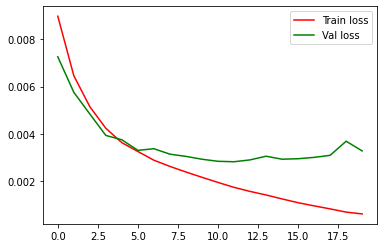

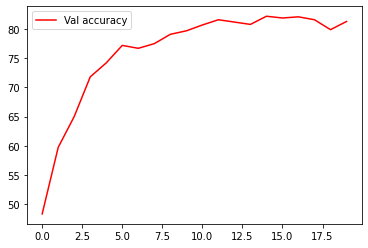

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
model.eval()

plt.figure(2)
plt.plot(loss_train, 'r', label='Train loss')
plt.plot(loss_val, 'g', label='Val loss')
plt.legend()
plt.show()

plt.figure(3)
plt.plot(accuracy_val, 'r', label='Val accuracy')
plt.legend()
plt.show()


After training

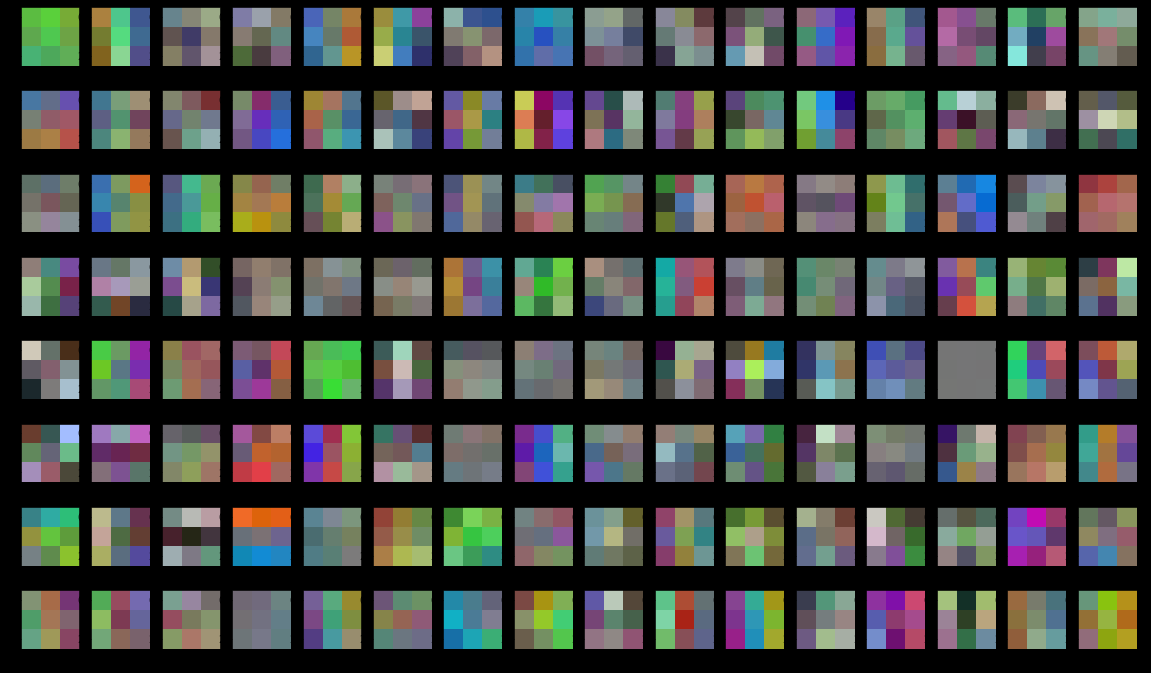

In [ ]:
#======================================================================================
# Q1.a: Implementing the function to visualize the filters in the first conv layers.
# Visualize the filters before training
#======================================================================================
VisualizeFilter(model)

### Question 2

In [ ]:
#--------------------------------
# Device configuration
#--------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

#--------------------------------
# Hyper-parameters
#--------------------------------
input_size = 3
num_classes = 10
hidden_size = [128, 512, 512, 512, 512]
num_epochs = 50
batch_size = 200
learning_rate = 2e-3
learning_rate_decay = 0.95
reg=0.001
num_training= 49000
num_validation =1000
norm_layer = None #norm_layer = 'BN'
print(hidden_size)

min_valid_loss = np.Inf
n_epochs_stop = 6
epochs_no_improve = 0
early_stop = False


Using device: cuda
[128, 512, 512, 512, 512]


In [ ]:
#-------------------------------------------------
# Convolutional neural network (Q1.a and Q2.a)
# Set norm_layer for different networks whether using batch normalization
#-------------------------------------------------
class ConvNet(nn.Module):
    def __init__(self, input_size, hidden_layers, num_classes, norm_layer=None):
        super(ConvNet, self).__init__()
        #################################################################################
        # TODO: Initialize the modules required to implement the convolutional layer    #
        # described in the exercise.                                                    #
        # For Q1.a make use of conv2d and relu layers from the torch.nn module.         #
        # For Q2.a make use of BatchNorm2d layer from the torch.nn module.              #
        # For Q3.b Use Dropout layer from the torch.nn module.                          #
        #################################################################################
        layers = []
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
            
        # Convolutional layer block 1

        layers.append(nn.Conv2d(input_size, hidden_size[0], kernel_size = 3, stride = 1, padding =1)),
        #layers.append(nn.Dropout(0.2)),
        layers.append(nn.BatchNorm2d(hidden_size[0])),
        layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2)),
        layers.append(nn.ReLU()),

        # Convolution layer block 2 

        layers.append(nn.Conv2d(hidden_size[0], hidden_size[1], kernel_size = 3, stride = 1, padding =1)),
        #layers.append(nn.Dropout(0.2)),
        layers.append(nn.BatchNorm2d(hidden_size[1])),
        layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2)),
        layers.append(nn.ReLU()),

        # Convolution layer block 3 

        layers.append(nn.Conv2d(hidden_size[1], hidden_size[2], kernel_size = 3, stride = 1, padding =1)),
        #layers.append(nn.Dropout(0.2)),
        layers.append(nn.BatchNorm2d(hidden_size[2])),
        layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2)),
        layers.append(nn.ReLU()),

        # Convolution layer block 4 

        layers.append(nn.Conv2d(hidden_size[2], hidden_size[3], kernel_size = 3, stride = 1, padding =1)),
        #layers.append(nn.Dropout(0.2)),
        layers.append(nn.BatchNorm2d(hidden_size[3])),
        layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2)),
        layers.append(nn.ReLU()),

        # Convolution layer block 5

        layers.append(nn.Conv2d(hidden_size[3], hidden_size[4], kernel_size = 3, stride = 1, padding =1)),
        #layers.append(nn.Dropout(0.2)),
        layers.append(nn.BatchNorm2d(hidden_size[4])),
        layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2))
        layers.append(nn.ReLU()),

        self.conv_layer = nn.Sequential(*layers)
        
        self.Dense = nn.Sequential(
            nn.Linear(hidden_size[4], num_classes)
        )

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        #################################################################################
        # TODO: Implement the forward pass computations                                 #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fully connected layer
        out = self.Dense(x)


        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out


In [ ]:
#======================================================================================
# Q1.a: Implementing convolutional neural net in PyTorch
#======================================================================================
# In this question we will implement a convolutional neural networks using the PyTorch
# library.  Please complete the code for the ConvNet class evaluating the model
#--------------------------------------------------------------------------------------
model = ConvNet(input_size, hidden_size, num_classes, norm_layer="BN").to(device)
# Q2.a - Initialize the model with correct batch norm layer

model.apply(weights_init)
# Print the model
print(model)

ConvNet(
  (conv_layer): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
    (4): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): ReLU()
    (8): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): ReLU()
    (12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
loss_train = []
loss_val = []
best_accuracy = 0
accuracy_val = []
best_model = type(model)(input_size, hidden_size, num_classes, norm_layer=norm_layer) # get a new instance
#best_model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer)
for epoch in range(num_epochs):

    model.train()

    loss_iter = 0
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_iter += loss.item()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
    loss_train.append(loss_iter/(len(train_loader)*batch_size))

    
    
    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    
        
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        loss_iter = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            loss = criterion(outputs, labels)
            loss_iter += loss.item()
        
        loss_val.append(loss_iter/(len(val_loader)*batch_size))

        accuracy = 100 * correct / total
        accuracy_val.append(accuracy)
        print('Validation accuracy is: {} %'.format(accuracy))
        #################################################################################
        # TODO: Q2.b Implement the early stopping mechanism to save the model which has #
        # the model with the best validation accuracy so-far (use best_model).          #
        #################################################################################

        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        if epoch == 0 or accuracy >= np.max(accuracy_val):
            best_model = model
            # saves the model checkpoint
            torch.save(best_model.state_dict(), 'model.ckpt')
            if epoch > 0:
                print(
                    f"\tHigher validation accuracy at epoch {epoch+1} with acuracy {accuracy}%")
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

Epoch [1/50], Step [100/245], Loss: 0.5183
Epoch [1/50], Step [200/245], Loss: 0.6832
Validation accuracy is: 71.2 %
Epoch [2/50], Step [100/245], Loss: 0.6460
Epoch [2/50], Step [200/245], Loss: 0.3351
Validation accuracy is: 75.5 %
	Higher validation accuracy at epoch 2 with acuracy 75.5%
Epoch [3/50], Step [100/245], Loss: 0.4680
Epoch [3/50], Step [200/245], Loss: 0.4685
Validation accuracy is: 77.1 %
	Higher validation accuracy at epoch 3 with acuracy 77.1%
Epoch [4/50], Step [100/245], Loss: 0.3647
Epoch [4/50], Step [200/245], Loss: 0.4326
Validation accuracy is: 78.8 %
	Higher validation accuracy at epoch 4 with acuracy 78.8%
Epoch [5/50], Step [100/245], Loss: 0.3637
Epoch [5/50], Step [200/245], Loss: 0.3241
Validation accuracy is: 78.4 %
Epoch [6/50], Step [100/245], Loss: 0.2828
Epoch [6/50], Step [200/245], Loss: 0.3509
Validation accuracy is: 79.1 %
	Higher validation accuracy at epoch 6 with acuracy 79.1%
Epoch [7/50], Step [100/245], Loss: 0.2700
Epoch [7/50], Step [200

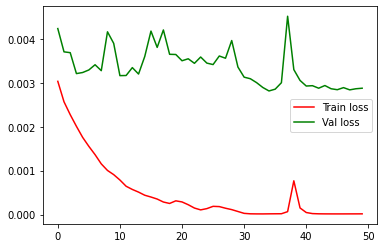

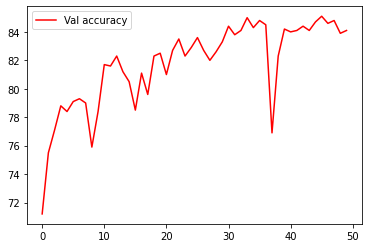

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
model.eval()

plt.figure(2)
plt.plot(loss_train, 'r', label='Train loss')
plt.plot(loss_val, 'g', label='Val loss')
plt.legend()
plt.show()

plt.figure(3)
plt.plot(accuracy_val, 'r', label='Val accuracy')
plt.legend()
plt.show()

### Question 3

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np

import matplotlib.pyplot as plt


def weights_init(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)

def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr



#--------------------------------
# Device configuration
#--------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)


Using device: cuda


In [ ]:
#--------------------------------
# Hyper-parameters
#--------------------------------
input_size = 3
num_classes = 10
hidden_size = [128, 512, 512, 512, 512]
num_epochs = 40
batch_size = 200
learning_rate = 2e-3
learning_rate_decay = 0.95
reg=0.001
num_training= 49000
num_validation =1000
norm_layer = None #norm_layer = 'BN'
print(hidden_size)


[128, 512, 512, 512, 512]


In [ ]:
#-------------------------------------------------
# Load the CIFAR-10 dataset
#-------------------------------------------------
#################################################################################
# TODO: Q3.a Choose the right data augmentation transforms with the right       #
# hyper-parameters and put them in the data_aug_transforms variable             #
#################################################################################
data_aug_transforms = []
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
data_aug_transforms += [transforms.RandomHorizontalFlip(0.5),
                        transforms.RandomPerspective(distortion_scale=0.5, p=0.5, interpolation=3, fill=0),
                        transforms.ColorJitter(brightness=0.1, contrast=0.05, saturation=0.1, hue=0.05)]

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
norm_transform = transforms.Compose(data_aug_transforms+[transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
cifar_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                           train=True,
                                           transform=norm_transform,
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                          train=False,
                                          transform=test_transform
                                          )

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:734: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


Files already downloaded and verified


In [ ]:
#-------------------------------------------------
# Prepare the training and validation splits
#-------------------------------------------------
mask = list(range(num_training))
train_dataset = torch.utils.data.Subset(cifar_dataset, mask)
mask = list(range(num_training, num_training + num_validation))
val_dataset = torch.utils.data.Subset(cifar_dataset, mask)

#-------------------------------------------------
# Data loader
#-------------------------------------------------
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


In [ ]:
#-------------------------------------------------
# Convolutional neural network (Q1.a and Q2.a)
# Set norm_layer for different networks whether using batch normalization
#-------------------------------------------------
class ConvNet(nn.Module):
    def __init__(self, input_size, hidden_layers, num_classes, norm_layer=None):
        super(ConvNet, self).__init__()
        #################################################################################
        # TODO: Initialize the modules required to implement the convolutional layer    #
        # described in the exercise.                                                    #
        # For Q1.a make use of conv2d and relu layers from the torch.nn module.         #
        # For Q2.a make use of BatchNorm2d layer from the torch.nn module.              #
        # For Q3.b Use Dropout layer from the torch.nn module.                          #
        #################################################################################
        layers = []
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
            
        # Convolutional layer block 1

        layers.append(nn.Conv2d(input_size, hidden_size[0], kernel_size = 3, stride = 1, padding =1)),
        #layers.append(nn.Dropout(p)),
        layers.append(nn.BatchNorm2d(hidden_size[0])),
        layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2)),
        layers.append(nn.ReLU()),

        # Convolution layer block 2 

        layers.append(nn.Conv2d(hidden_size[0], hidden_size[1], kernel_size = 3, stride = 1, padding =1)),
        #layers.append(nn.Dropout(0.2)),
        layers.append(nn.BatchNorm2d(hidden_size[1])),
        layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2)),
        layers.append(nn.ReLU()),

        # Convolution layer block 3 

        layers.append(nn.Conv2d(hidden_size[1], hidden_size[2], kernel_size = 3, stride = 1, padding =1)),
        #layers.append(nn.Dropout(0.2)),
        layers.append(nn.BatchNorm2d(hidden_size[2])),
        layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2)),
        layers.append(nn.ReLU()),

        # Convolution layer block 4 

        layers.append(nn.Conv2d(hidden_size[2], hidden_size[3], kernel_size = 3, stride = 1, padding =1)),
        #layers.append(nn.Dropout(0.2)),
        layers.append(nn.BatchNorm2d(hidden_size[3])),
        layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2)),
        layers.append(nn.ReLU()),

        # Convolution layer block 5

        layers.append(nn.Conv2d(hidden_size[3], hidden_size[4], kernel_size = 3, stride = 1, padding =1)),
        #layers.append(nn.Dropout(0.2)),
        layers.append(nn.BatchNorm2d(hidden_size[4])),
        layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2))
        layers.append(nn.ReLU()),

        self.conv_layer = nn.Sequential(*layers)
        
        self.Dense = nn.Sequential(
            nn.Linear(hidden_size[4], num_classes)
        )

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        #################################################################################
        # TODO: Implement the forward pass computations                                 #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fully connected layer
        out = self.Dense(x)


        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out


In [ ]:
#======================================================================================
# Q1.a: Implementing convolutional neural net in PyTorch
#======================================================================================
# In this question we will implement a convolutional neural networks using the PyTorch
# library.  Please complete the code for the ConvNet class evaluating the model
#--------------------------------------------------------------------------------------
model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer).to(device)
# Q2.a - Initialize the model with correct batch norm layer

model.apply(weights_init)
# Print the model
print(model)

ConvNet(
  (conv_layer): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ReLU()
    (4): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): ReLU()
    (8): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): ReLU()
    (12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
loss_train = []
loss_val = []
best_accuracy = None
accuracy_val = []
best_model = type(model)(input_size, hidden_size, num_classes, norm_layer=norm_layer) # get a new instance
#best_model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer)
for epoch in range(num_epochs):

    model.train()

    loss_iter = 0
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_iter += loss.item()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
    loss_train.append(loss_iter/(len(train_loader)*batch_size))

    
    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    
        
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        loss_iter = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            loss = criterion(outputs, labels)
            loss_iter += loss.item()
        
        loss_val.append(loss_iter/(len(val_loader)*batch_size))

        accuracy = 100 * correct / total
        accuracy_val.append(accuracy)
        print('Validation accuracy is: {} %'.format(accuracy))
        #################################################################################
        # TODO: Q2.b Implement the early stopping mechanism to save the model which has #
        # the model with the best validation accuracy so-far (use best_model).          #
        #################################################################################

        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


Epoch [1/40], Step [100/245], Loss: 1.5392
Epoch [1/40], Step [200/245], Loss: 1.3199
Validation accuracy is: 44.3 %
Epoch [2/40], Step [100/245], Loss: 1.3189
Epoch [2/40], Step [200/245], Loss: 1.1952
Validation accuracy is: 49.7 %
Epoch [3/40], Step [100/245], Loss: 0.9307
Epoch [3/40], Step [200/245], Loss: 1.0659
Validation accuracy is: 61.3 %
Epoch [4/40], Step [100/245], Loss: 0.9974
Epoch [4/40], Step [200/245], Loss: 0.8006
Validation accuracy is: 64.6 %
Epoch [5/40], Step [100/245], Loss: 0.8745
Epoch [5/40], Step [200/245], Loss: 0.8401
Validation accuracy is: 68.4 %
Epoch [6/40], Step [100/245], Loss: 0.6380
Epoch [6/40], Step [200/245], Loss: 0.8212
Validation accuracy is: 71.5 %
Epoch [7/40], Step [100/245], Loss: 0.6912
Epoch [7/40], Step [200/245], Loss: 0.7718
Validation accuracy is: 72.6 %
Epoch [8/40], Step [100/245], Loss: 0.8034
Epoch [8/40], Step [200/245], Loss: 0.6701
Validation accuracy is: 70.7 %
Epoch [9/40], Step [100/245], Loss: 0.7185
Epoch [9/40], Step [2

In [ ]:
np.max(accuracy_val)

86.1

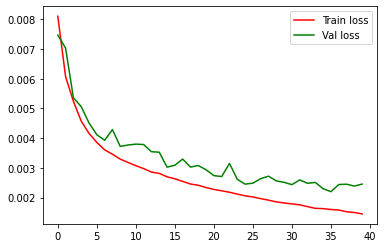

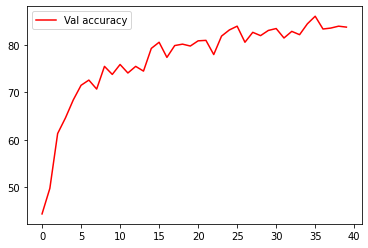

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
model.eval()



plt.figure(2)
plt.plot(loss_train, 'r', label='Train loss')
plt.plot(loss_val, 'g', label='Val loss')
plt.legend()
plt.show()

plt.figure(3)
plt.plot(accuracy_val, 'r', label='Val accuracy')
plt.legend()
plt.show()

data_aug_transforms += [transforms.RandomCrop(32, padding=4),
                        transforms.RandomHorizontalFlip(),
                        transforms.RandomVerticalFlip(),
                        transforms.RandomPerspective(distortion_scale=0.5, p=0.5, interpolation=3, fill=0),
                        transforms.RandomAffine(0, translate=[0.2,0.2]),
                        transforms.RandomRotation(degrees=(-180,180)),
                        transforms.ColorJitter(brightness=0.1, contrast=0.05, saturation=0.1, hue=0.05)]

Highest validation accuracy : 58.8%


data_aug_transforms += [transforms.RandomHorizontalFlip(),
                        transforms.RandomPerspective(distortion_scale=0.5, p=0.5, interpolation=3, fill=0),
                        transforms.RandomAffine(0, translate=[0.2,0.2]),
                        transforms.RandomRotation(degrees=(-180,180)),
                        transforms.ColorJitter(brightness=0.1, contrast=0.05, saturation=0.1, hue=0.05)]

Highest Validation accuracy : 62.4

data_aug_transforms += [transforms.RandomHorizontalFlip(0.5),
                        transforms.RandomPerspective(distortion_scale=0.5, p=0.5, interpolation=3, fill=0),
                        transforms.RandomAffine(0, translate=[0.2,0.2]),
                        transforms.ColorJitter(brightness=0.1, contrast=0.05, saturation=0.1, hue=0.05)]

Highest Validation accuarcy: 84.3

data_aug_transforms += [transforms.RandomHorizontalFlip(0.5),
                        transforms.RandomPerspective(distortion_scale=0.5, p=0.5, interpolation=3, fill=0),
                        transforms.ColorJitter(brightness=0.1, contrast=0.05, saturation=0.1, hue=0.05)]

Highest validation accuracy : 86.1

Question 3 b

In [ ]:
#--------------------------------
# Hyper-parameters
#--------------------------------
input_size = 3
num_classes = 10
hidden_size = [128, 512, 512, 512, 512]
num_epochs = 30
batch_size = 200
learning_rate = 2e-3
learning_rate_decay = 0.95
reg=0.001
num_training= 49000
num_validation =1000
norm_layer = None #norm_layer = 'BN'
print(hidden_size)

p = 0.9

[128, 512, 512, 512, 512]


In [ ]:
#-------------------------------------------------
# Load the CIFAR-10 dataset
#-------------------------------------------------
#################################################################################
# TODO: Q3.a Choose the right data augmentation transforms with the right       #
# hyper-parameters and put them in the data_aug_transforms variable             #
#################################################################################
data_aug_transforms = []
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
norm_transform = transforms.Compose(data_aug_transforms+[transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])
cifar_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                           train=True,
                                           transform=norm_transform,
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                          train=False,
                                          transform=test_transform
                                          )

Files already downloaded and verified


In [ ]:
#-------------------------------------------------
# Prepare the training and validation splits
#-------------------------------------------------
mask = list(range(num_training))
train_dataset = torch.utils.data.Subset(cifar_dataset, mask)
mask = list(range(num_training, num_training + num_validation))
val_dataset = torch.utils.data.Subset(cifar_dataset, mask)

#-------------------------------------------------
# Data loader
#-------------------------------------------------
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


In [ ]:
#-------------------------------------------------
# Convolutional neural network (Q1.a and Q2.a)
# Set norm_layer for different networks whether using batch normalization
#-------------------------------------------------
class ConvNet(nn.Module):
    def __init__(self, input_size, hidden_layers, num_classes, norm_layer=None):
        super(ConvNet, self).__init__()
        #################################################################################
        # TODO: Initialize the modules required to implement the convolutional layer    #
        # described in the exercise.                                                    #
        # For Q1.a make use of conv2d and relu layers from the torch.nn module.         #
        # For Q2.a make use of BatchNorm2d layer from the torch.nn module.              #
        # For Q3.b Use Dropout layer from the torch.nn module.                          #
        #################################################################################
        layers = []
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
            
        # Convolutional layer block 1

        layers.append(nn.Conv2d(input_size, hidden_size[0], kernel_size = 3, stride = 1, padding =1)),
        layers.append(nn.Dropout(p)),
        layers.append(nn.BatchNorm2d(hidden_size[0])),
        layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2)),
        layers.append(nn.ReLU()),

        # Convolution layer block 2 

        layers.append(nn.Conv2d(hidden_size[0], hidden_size[1], kernel_size = 3, stride = 1, padding =1)),
        layers.append(nn.Dropout(p)),
        layers.append(nn.BatchNorm2d(hidden_size[1])),
        layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2)),
        layers.append(nn.ReLU()),

        # Convolution layer block 3 

        layers.append(nn.Conv2d(hidden_size[1], hidden_size[2], kernel_size = 3, stride = 1, padding =1)),
        layers.append(nn.Dropout(p)),
        layers.append(nn.BatchNorm2d(hidden_size[2])),
        layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2)),
        layers.append(nn.ReLU()),

        # Convolution layer block 4 

        layers.append(nn.Conv2d(hidden_size[2], hidden_size[3], kernel_size = 3, stride = 1, padding =1)),
        layers.append(nn.Dropout(p)),
        layers.append(nn.BatchNorm2d(hidden_size[3])),
        layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2)),
        layers.append(nn.ReLU()),

        # Convolution layer block 5

        layers.append(nn.Conv2d(hidden_size[3], hidden_size[4], kernel_size = 3, stride = 1, padding =1)),
        layers.append(nn.Dropout(p)),
        layers.append(nn.BatchNorm2d(hidden_size[4])),
        layers.append(nn.MaxPool2d(kernel_size = 2, stride = 2))
        layers.append(nn.ReLU()),

        self.conv_layer = nn.Sequential(*layers)
        
        self.Dense = nn.Sequential(
            nn.Linear(hidden_size[4], num_classes)
        )

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        #################################################################################
        # TODO: Implement the forward pass computations                                 #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fully connected layer
        out = self.Dense(x)


        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out


In [ ]:
#======================================================================================
# Q1.a: Implementing convolutional neural net in PyTorch
#======================================================================================
# In this question we will implement a convolutional neural networks using the PyTorch
# library.  Please complete the code for the ConvNet class evaluating the model
#--------------------------------------------------------------------------------------
model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer).to(device)
# Q2.a - Initialize the model with correct batch norm layer

model.apply(weights_init)
# Print the model
print(model)

ConvNet(
  (conv_layer): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Dropout(p=0.9, inplace=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): ReLU()
    (5): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): Dropout(p=0.9, inplace=False)
    (7): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): ReLU()
    (10): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): Dropout(p=0.9, inplace=False)
    (12): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): ReLU()
    (15): Conv2d(512, 512, kernel_size=(3,

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
loss_train = []
loss_val = []
best_accuracy = None
accuracy_val = []
best_model = type(model)(input_size, hidden_size, num_classes, norm_layer=norm_layer) # get a new instance
#best_model = ConvNet(input_size, hidden_size, num_classes, norm_layer=norm_layer)
for epoch in range(num_epochs):

    model.train()

    loss_iter = 0
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_iter += loss.item()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            
    loss_train.append(loss_iter/(len(train_loader)*batch_size))

    
    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    
        
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        loss_iter = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            loss = criterion(outputs, labels)
            loss_iter += loss.item()
        
        loss_val.append(loss_iter/(len(val_loader)*batch_size))

        accuracy = 100 * correct / total
        accuracy_val.append(accuracy)
        print('Validation accuracy is: {} %'.format(accuracy))
        #################################################################################
        # TODO: Q2.b Implement the early stopping mechanism to save the model which has #
        # the model with the best validation accuracy so-far (use best_model).          #
        #################################################################################

        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


Epoch [1/30], Step [100/245], Loss: 1.7920
Epoch [1/30], Step [200/245], Loss: 1.6126
Validation accuracy is: 10.2 %
Epoch [2/30], Step [100/245], Loss: 1.6768
Epoch [2/30], Step [200/245], Loss: 1.6867
Validation accuracy is: 10.2 %
Epoch [3/30], Step [100/245], Loss: 1.6843
Epoch [3/30], Step [200/245], Loss: 1.5988
Validation accuracy is: 10.2 %
Epoch [4/30], Step [100/245], Loss: 1.5413
Epoch [4/30], Step [200/245], Loss: 1.4732
Validation accuracy is: 10.2 %
Epoch [5/30], Step [100/245], Loss: 1.3786
Epoch [5/30], Step [200/245], Loss: 1.5100
Validation accuracy is: 11.2 %
Epoch [6/30], Step [100/245], Loss: 1.4941
Epoch [6/30], Step [200/245], Loss: 1.4867
Validation accuracy is: 12.7 %
Epoch [7/30], Step [100/245], Loss: 1.4784
Epoch [7/30], Step [200/245], Loss: 1.4266
Validation accuracy is: 11.2 %
Epoch [8/30], Step [100/245], Loss: 1.4945
Epoch [8/30], Step [200/245], Loss: 1.5447
Validation accuracy is: 11.2 %
Epoch [9/30], Step [100/245], Loss: 1.3335
Epoch [9/30], Step [2

In [ ]:
loss_train_p9 = loss_train
loss_val_p9 = loss_val
val_acc_p9 = accuracy_val

In [ ]:
def saveList(myList,filename):
    # the filename should mention the extension 'npy'
    np.save(filename,myList)
    print("Saved successfully!")

In [ ]:
def loadList(filename):
    # the filename should mention the extension 'npy'
    tempNumpyArray=np.load(filename)
    return tempNumpyArray.tolist()

In [ ]:
saveList(loss_train_p9, 'loss_train_p9.npy')
saveList(loss_val_p9, 'loss_val_p9.npy')
saveList(val_acc_p9, 'val_acc_p9.npy')  

Saved successfully!
Saved successfully!
Saved successfully!


In [ ]:
loss_train_p1 = loadList('loss_train_p1.npy')
loss_val_p1 = loadList('loss_val_p1.npy')
val_acc_p1 = loadList('val_acc_p1.npy')

In [ ]:
loss_train_p2 = loadList('loss_train_p2.npy')
loss_val_p2 = loadList('loss_val_p2.npy')
val_acc_p2 = loadList('val_acc_p2.npy')

In [ ]:
loss_train_p3 = loadList('loss_train_p3.npy')
loss_val_p3 = loadList('loss_val_p3.npy')
val_acc_p3 = loadList('val_acc_p3.npy')

In [ ]:
loss_train_p4 = loadList('loss_train_p4.npy')
loss_val_p4 = loadList('loss_val_p4.npy')
val_acc_p4 = loadList('val_acc_p4.npy')

In [ ]:
loss_train_p5 = loadList('loss_train_p5.npy')
loss_val_p5 = loadList('loss_val_p5.npy')
val_acc_p5 = loadList('val_acc_p5.npy')

In [ ]:
loss_train_p6 = loadList('loss_train_p6.npy')
loss_val_p6 = loadList('loss_val_p6.npy')
val_acc_p6 = loadList('val_acc_p6.npy')

In [ ]:
loss_train_p7 = loadList('loss_train_p7.npy')
loss_val_p7 = loadList('loss_val_p7.npy')
val_acc_p7 = loadList('val_acc_p7.npy')

In [ ]:
loss_train_p8 = loadList('loss_train_p8.npy')
loss_val_p8 = loadList('loss_val_p8.npy')
val_acc_p8 = loadList('val_acc_p8.npy')

In [ ]:
loss_train_p9 = loadList('loss_train_p9.npy')
loss_val_p9 = loadList('loss_val_p9.npy')
val_acc_p9 = loadList('val_acc_p9.npy')

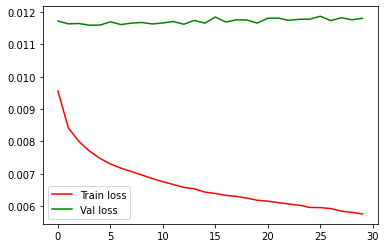

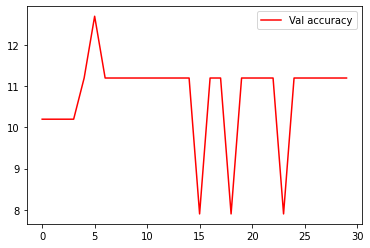

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
model.eval()



plt.figure(2)
plt.plot(loss_train, 'r', label='Train loss')
plt.plot(loss_val, 'g', label='Val loss')
plt.legend()
plt.show()

plt.figure(3)
plt.plot(accuracy_val, 'r', label='Val accuracy')
plt.legend()
plt.show()

In [ ]:
#################################################################################
# TODO: Q2.b Implement the early stopping mechanism to load the weights from the#
# best model so far and perform testing with this model.                        #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

#Compute accuracy on the test set
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if total == 1000:
            break

    print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))



Accuracy of the network on the 1000 test images: 10.3 %


p=0.1, test acc = 81.3%\
p=0.2, test acc = 75.4%\
p=0.3, test acc = 55.0%\
p=0.4, test acc = 18.8%\
p=0.5, test acc = 17.9%\
p=0.6, test acc = 9.0%\
p=0.7, test acc = 19.5%\
p=0.8, test acc = 10.3%\
p=0.8, test acc = 10.3%

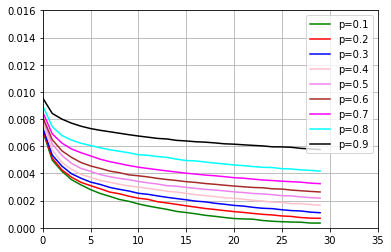

In [ ]:
plt.figure(2)
plt.plot(loss_train_p1, color='green', label = 'p=0.1')
plt.plot(loss_train_p2, color='red', label = 'p=0.2')
plt.plot(loss_train_p3, color='blue', label = 'p=0.3')
plt.plot(loss_train_p4, color='pink', label = 'p=0.4')
plt.plot(loss_train_p5, color='violet', label = 'p=0.5')
plt.plot(loss_train_p6, color='brown', label = 'p=0.6')
plt.plot(loss_train_p7, color='magenta', label = 'p=0.7')
plt.plot(loss_train_p8, color='cyan', label = 'p=0.8')
plt.plot(loss_train_p9, color='black', label = 'p=0.9')
plt.grid()
plt.ylim(0, 0.016)
plt.xlim(0,35)
plt.legend()

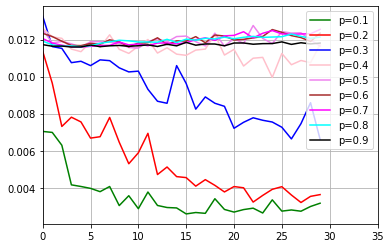

In [ ]:
plt.figure(3)
plt.plot(loss_val_p1, color='green', label = 'p=0.1')
plt.plot(loss_val_p2, color='red', label = 'p=0.2')
plt.plot(loss_val_p3, color='blue', label = 'p=0.3')
plt.plot(loss_val_p4, color='pink', label = 'p=0.4')
plt.plot(loss_val_p5, color='violet', label = 'p=0.5')
plt.plot(loss_val_p6, color='brown', label = 'p=0.6')
plt.plot(loss_val_p7, color='magenta', label = 'p=0.7')
plt.plot(loss_val_p8, color='cyan', label = 'p=0.8')
plt.plot(loss_val_p9, color='black', label = 'p=0.9')
plt.grid()
plt.xlim(0,35)
plt.legend(loc = "upper right")

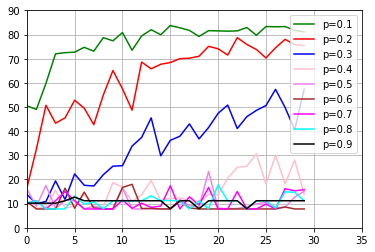

In [ ]:
plt.figure(3)
plt.plot(val_acc_p1, color='green', label = 'p=0.1')
plt.plot(val_acc_p2, color='red', label = 'p=0.2')
plt.plot(val_acc_p3, color='blue', label = 'p=0.3')
plt.plot(val_acc_p4, color='pink', label = 'p=0.4')
plt.plot(val_acc_p5, color='violet', label = 'p=0.5')
plt.plot(val_acc_p6, color='brown', label = 'p=0.6')
plt.plot(val_acc_p7, color='magenta', label = 'p=0.7')
plt.plot(val_acc_p8, color='cyan', label = 'p=0.8')
plt.plot(val_acc_p9, color='black', label = 'p=0.9')
plt.ylim(0, 90)
plt.xlim(0,35)
plt.grid()
plt.legend(loc = "upper right")

### Question 4 a

In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models
import torchvision.transforms as transforms
import numpy as np


import matplotlib.pyplot as plt

def weights_init(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)

def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

#--------------------------------
# Device configuration
#--------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

#--------------------------------
# Hyper-parameters
#--------------------------------
input_size = 32 * 32 * 3
layer_config= [512, 256]
num_classes = 10
num_epochs = 30
batch_size = 200
learning_rate = 1e-3
learning_rate_decay = 0.99
reg=0#0.001
num_training= 49000
num_validation =1000
fine_tune = True
pretrained=True


Using device: cuda


In [ ]:
#-------------------------------------------------
# Load the CIFAR-10 dataset
#-------------------------------------------------
data_aug_transforms = [transforms.RandomHorizontalFlip(p=0.5)]#, transforms.RandomGrayscale(p=0.05)]
###############################################################################
# TODO: Add to data_aug_transforms the best performing data augmentation      #
# strategy and hyper-parameters as found out in Q3.a                          #
###############################################################################

norm_transform = transforms.Compose(data_aug_transforms+[transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
                                     ]) #Need to preserve the normalization values of the pre-trained model
cifar_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                           train=True,
                                           transform=norm_transform,
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                          train=False,
                                          transform=norm_transform
                                          )

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting datasets/cifar-10-python.tar.gz to datasets/


In [ ]:
#-------------------------------------------------
# Prepare the training and validation splits
#-------------------------------------------------
mask = list(range(num_training))
train_dataset = torch.utils.data.Subset(cifar_dataset, mask)
mask = list(range(num_training, num_training + num_validation))
val_dataset = torch.utils.data.Subset(cifar_dataset, mask)

#-------------------------------------------------
# Data loader
#-------------------------------------------------
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False


In [ ]:
class VggModel(nn.Module):
    def __init__(self, n_class, fine_tune, pretrained=True):
        super(VggModel, self).__init__()
        #################################################################################
        # TODO: Build the classification network described in Q4 using the              #
        # models.vgg11_bn network from torchvision model zoo as the feature extraction  #
        # layers and two linear layers on top for classification. You can load the      #
        # pretrained ImageNet weights based on the pretrained flag. You can enable and  #
        # disable training the feature extraction layers based on the fine_tune flag.   #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        layers =[]
        model = models.vgg11_bn(pretrained=True)
        self.features = nn.Sequential(*(list(model.children())))[:-2]
        layers.append(nn.Linear(layer_config[0], layer_config[1]))
        layers.append(nn.BatchNorm1d(layer_config[1]))
        layers.append(nn.ReLU())
        layers.append(nn.Linear(layer_config[1], n_class))
        self.classifier = nn.Sequential(*layers)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        #################################################################################
        # TODO: Implement the forward pass computations                                 #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        out = self.features(x)
        out = out.view(-1, 512)
        out = self.classifier(out)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [ ]:
# Initialize the model for this run
model= VggModel(num_classes, fine_tune, pretrained)

if (pretrained==False):
    model.apply(weights_init)

# Print the model we just instantiated
print(model)

Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/hub/checkpoints/vgg11_bn-6002323d.pth


  0%|          | 0.00/507M [00:00<?, ?B/s]

VggModel(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU(inplace=True)
      (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): ReLU(inplace=True)
      (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [ ]:
#################################################################################
# TODO: Only select the required parameters to pass to the optimizer. No need to#
# update parameters which should be held fixed (conv layers).                   #
#################################################################################
print("Params to learn:")
if fine_tune:
    params_to_update = []
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****      
    params_to_update += [parameter for parameter in model.classifier.parameters()]
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
else:
    params_to_update = model.parameters()
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

model.to(device)

Params to learn:


VggModel(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU(inplace=True)
      (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): ReLU(inplace=True)
      (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params_to_update, lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
loss_train = []
loss_val = []
best_accuracy = None
accuracy_val = []
count=0
patience=10
best_model = type(model)(num_classes, fine_tune, pretrained) # get a new instance
for epoch in range(num_epochs):

    model.train()

    loss_iter = 0
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_iter += loss.item()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    loss_train.append(loss_iter/(len(train_loader)*batch_size))


    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    
    
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        loss_iter = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            loss = criterion(outputs, labels)
            loss_iter += loss.item()
            
        loss_val.append(loss_iter/(len(val_loader)*batch_size))

        accuracy = 100 * correct / total
        accuracy_val.append(accuracy)
        
        print('Validataion accuracy is: {} %'.format(accuracy))
        #################################################################################
        # TODO: Q2.b Use the early stopping mechanism from previous questions to save   #
        # the model with the best validation accuracy so-far (use best_model).          #
        #################################################################################

        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        if epoch == 0 or accuracy >= np.max(accuracy_val):
            count=0
            best_model = model
            # saves the model checkpoint
            torch.save(best_model.state_dict(), 'model.ckpt')
            
            if epoch == 1:
                print(
                    f"Best accuracy improved from {np.max(accuracy_val[(epoch-1)])}% to {accuracy}%,\n count={count}")

            if epoch > 1:
                print(
                    f"Best accuracy improved from {np.max(accuracy_val[:(epoch)])}% to {accuracy}%,\n count={count}")
        
            
        else:
            
            count+=1
            print(f"Best accuracy did not improve from {np.max(accuracy_val)}%,\ncount= {count}")
            
            if count==patience:
                break
        eval_dict=zip(list(range(1,num_epochs+1)), accuracy_val)
        eval_dict=dict(eval_dict)
        max_key = max(eval_dict, key=lambda k: eval_dict[k])
print(f"Highest validation accuracy is at epoch {max_key} with corresponding validation accuracy {eval_dict[max_key]}%,\n count={count}")
       
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


Epoch [1/30], Step [100/245], Loss: 1.2052
Epoch [1/30], Step [200/245], Loss: 1.0279
Validataion accuracy is: 60.6 %
Epoch [2/30], Step [100/245], Loss: 1.1000
Epoch [2/30], Step [200/245], Loss: 1.1348
Validataion accuracy is: 63.4 %
Best accuracy improved from 60.6% to 63.4%,
 count=0
Epoch [3/30], Step [100/245], Loss: 0.9262
Epoch [3/30], Step [200/245], Loss: 0.9805
Validataion accuracy is: 62.0 %
Best accuracy did not improve from 63.4%,
count= 1
Epoch [4/30], Step [100/245], Loss: 0.7847
Epoch [4/30], Step [200/245], Loss: 1.0714
Validataion accuracy is: 62.0 %
Best accuracy did not improve from 63.4%,
count= 2
Epoch [5/30], Step [100/245], Loss: 0.9232
Epoch [5/30], Step [200/245], Loss: 0.8828
Validataion accuracy is: 62.7 %
Best accuracy did not improve from 63.4%,
count= 3
Epoch [6/30], Step [100/245], Loss: 0.8257
Epoch [6/30], Step [200/245], Loss: 0.9735
Validataion accuracy is: 61.9 %
Best accuracy did not improve from 63.4%,
count= 4
Epoch [7/30], Step [100/245], Loss:

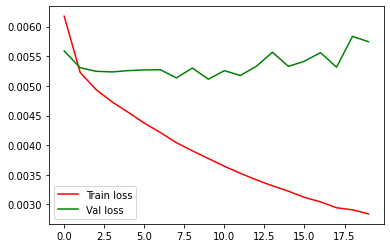

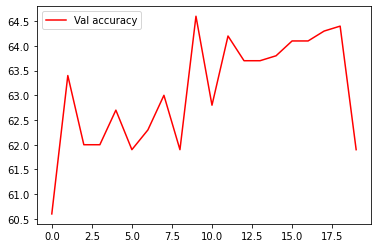

In [8]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
model.eval()


plt.figure(2)
plt.plot(loss_train, 'r', label='Train loss')
plt.plot(loss_val, 'g', label='Val loss')
plt.legend()
plt.show()

plt.figure(3)
plt.plot(accuracy_val, 'r', label='Val accuracy')
plt.legend()
plt.show()



In [9]:
#################################################################################
# TODO: Use the early stopping mechanism from previous question to load the     #
# weights from the best model so far and perform testing with this model.       #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

best_model = torch.load('model.ckpt')
model.load_state_dict(best_model)


# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if total == 1000:
            break

    print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))



# Save the model checkpoint
#torch.save(model.state_dict(), 'model.ckpt')


Accuracy of the network on the 1000 test images: 64.1 %


### Question 4 b

In [9]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models
import torchvision.transforms as transforms
import numpy as np


import matplotlib.pyplot as plt

def weights_init(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)

def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

#--------------------------------
# Device configuration
#--------------------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

#--------------------------------
# Hyper-parameters
#--------------------------------
input_size = 32 * 32 * 3
layer_config= [512, 256]
num_classes = 10
num_epochs = 30
batch_size = 200
learning_rate = 1e-3
learning_rate_decay = 0.95
reg=0#0.001
num_training= 49000
num_validation =1000
fine_tune = False
pretrained=False


Using device: cuda


In [10]:
#-------------------------------------------------
# Load the CIFAR-10 dataset
#-------------------------------------------------
data_aug_transforms = [transforms.RandomHorizontalFlip(0.5),
                        transforms.RandomGrayscale(p=0.05)]
###############################################################################
# TODO: Add to data_aug_transforms the best performing data augmentation      #
# strategy and hyper-parameters as found out in Q3.a                          #
###############################################################################

norm_transform = transforms.Compose(data_aug_transforms+[transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
                                     ]) #Need to preserve the normalization values of the pre-trained model
cifar_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                           train=True,
                                           transform=norm_transform,
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                          train=False,
                                          transform=norm_transform
                                          )

Files already downloaded and verified


In [11]:
#-------------------------------------------------
# Prepare the training and validation splits
#-------------------------------------------------
mask = list(range(num_training))
train_dataset = torch.utils.data.Subset(cifar_dataset, mask)
mask = list(range(num_training, num_training + num_validation))
val_dataset = torch.utils.data.Subset(cifar_dataset, mask)

#-------------------------------------------------
# Data loader
#-------------------------------------------------
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)



In [12]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False


In [13]:
class VggModel(nn.Module):
    def __init__(self, n_class, fine_tune, pretrained=True):
        super(VggModel, self).__init__()
        #################################################################################
        # TODO: Build the classification network described in Q4 using the              #
        # models.vgg11_bn network from torchvision model zoo as the feature extraction  #
        # layers and two linear layers on top for classification. You can load the      #
        # pretrained ImageNet weights based on the pretrained flag. You can enable and  #
        # disable training the feature extraction layers based on the fine_tune flag.   #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        layers =[]
        model = models.vgg11_bn(pretrained=True)
        self.features = nn.Sequential(*(list(model.children())))[:-2]
        layers.append(nn.Linear(layer_config[0], layer_config[1]))
        layers.append(nn.BatchNorm1d(layer_config[1]))
        layers.append(nn.ReLU())
        layers.append(nn.Linear(layer_config[1], n_class))
        self.classifier = nn.Sequential(*layers)

        if fine_tune:
          set_parameter_requires_grad(self, fine_tune)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        #################################################################################
        # TODO: Implement the forward pass computations                                 #
        #################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        out = self.features(x)
        out = out.view(-1, 512)
        out = self.classifier(out)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [14]:
# Initialize the model for this run
model= VggModel(num_classes, fine_tune, pretrained)

if (pretrained==False):
    model.apply(weights_init)

# Print the model we just instantiated
print(model)


VggModel(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU(inplace=True)
      (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): ReLU(inplace=True)
      (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [15]:
#################################################################################
# TODO: Only select the required parameters to pass to the optimizer. No need to#
# update parameters which should be held fixed (conv layers).                   #
#################################################################################
print("Params to learn:")
if fine_tune:
    params_to_update = []
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****      
    params_to_update += [parameter for parameter in model.classifier.parameters()]
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
else:
    params_to_update = model.parameters()
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            print("\t",name)


model.to(device)

Params to learn:
	 features.0.0.weight
	 features.0.0.bias
	 features.0.1.weight
	 features.0.1.bias
	 features.0.4.weight
	 features.0.4.bias
	 features.0.5.weight
	 features.0.5.bias
	 features.0.8.weight
	 features.0.8.bias
	 features.0.9.weight
	 features.0.9.bias
	 features.0.11.weight
	 features.0.11.bias
	 features.0.12.weight
	 features.0.12.bias
	 features.0.15.weight
	 features.0.15.bias
	 features.0.16.weight
	 features.0.16.bias
	 features.0.18.weight
	 features.0.18.bias
	 features.0.19.weight
	 features.0.19.bias
	 features.0.22.weight
	 features.0.22.bias
	 features.0.23.weight
	 features.0.23.bias
	 features.0.25.weight
	 features.0.25.bias
	 features.0.26.weight
	 features.0.26.bias
	 classifier.0.weight
	 classifier.0.bias
	 classifier.1.weight
	 classifier.1.bias
	 classifier.3.weight
	 classifier.3.bias


VggModel(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU(inplace=True)
      (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): ReLU(inplace=True)
      (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [16]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params_to_update, lr=learning_rate, weight_decay=reg)

# Train the model
lr = learning_rate
total_step = len(train_loader)
loss_train = []
loss_val = []
best_accuracy = None
accuracy_val = []
count=0
patience=10
best_model = type(model)(num_classes, fine_tune, pretrained) # get a new instance
for epoch in range(num_epochs):

    model.train()

    loss_iter = 0
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_iter += loss.item()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    loss_train.append(loss_iter/(len(train_loader)*batch_size))


    # Code to update the lr
    lr *= learning_rate_decay
    update_lr(optimizer, lr)
    
    
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        loss_iter = 0
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            loss = criterion(outputs, labels)
            loss_iter += loss.item()
            
        loss_val.append(loss_iter/(len(val_loader)*batch_size))

        accuracy = 100 * correct / total
        accuracy_val.append(accuracy)
        
        print('Validataion accuracy is: {} %'.format(accuracy))
        #################################################################################
        # TODO: Q2.b Use the early stopping mechanism from previous questions to save   #
        # the model with the best validation accuracy so-far (use best_model).          #
        #################################################################################

        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        if epoch == 0 or accuracy >= np.max(accuracy_val):
            count=0
            best_model = model
            # saves the model checkpoint
            torch.save(best_model.state_dict(), 'model.ckpt')
            
            if epoch == 1:
                print(
                    f"Best accuracy improved from {np.max(accuracy_val[(epoch-1)])}% to {accuracy}%,\n count={count}")

            if epoch > 1:
                print(
                    f"Best accuracy improved from {np.max(accuracy_val[:(epoch)])}% to {accuracy}%,\n count={count}")
        
            
        else:
            
            count+=1
            print(f"Best accuracy did not improve from {np.max(accuracy_val)}%,\ncount= {count}")
            
            if count==patience:
                break
        eval_dict=zip(list(range(1,num_epochs+1)), accuracy_val)
        eval_dict=dict(eval_dict)
        max_key = max(eval_dict, key=lambda k: eval_dict[k])
print(f"Highest validation accuracy is at epoch {max_key} with corresponding validation accuracy {eval_dict[max_key]}%,\n count={count}")

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


Epoch [1/30], Step [100/245], Loss: 0.5465
Epoch [1/30], Step [200/245], Loss: 0.6238
Validataion accuracy is: 83.1 %
Epoch [2/30], Step [100/245], Loss: 0.3824
Epoch [2/30], Step [200/245], Loss: 0.4832
Validataion accuracy is: 83.4 %
Best accuracy improved from 83.1% to 83.4%,
 count=0
Epoch [3/30], Step [100/245], Loss: 0.2690
Epoch [3/30], Step [200/245], Loss: 0.3502
Validataion accuracy is: 85.4 %
Best accuracy improved from 83.4% to 85.4%,
 count=0
Epoch [4/30], Step [100/245], Loss: 0.3266
Epoch [4/30], Step [200/245], Loss: 0.2316
Validataion accuracy is: 86.9 %
Best accuracy improved from 85.4% to 86.9%,
 count=0
Epoch [5/30], Step [100/245], Loss: 0.2268
Epoch [5/30], Step [200/245], Loss: 0.1890
Validataion accuracy is: 87.5 %
Best accuracy improved from 86.9% to 87.5%,
 count=0
Epoch [6/30], Step [100/245], Loss: 0.0974
Epoch [6/30], Step [200/245], Loss: 0.1478
Validataion accuracy is: 85.6 %
Best accuracy did not improve from 87.5%,
count= 1
Epoch [7/30], Step [100/245],

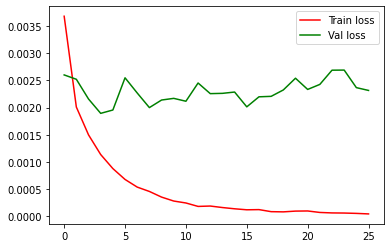

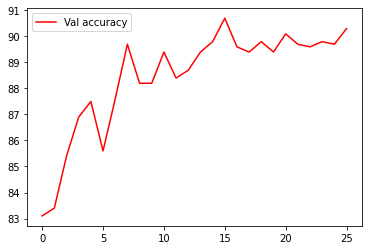

In [17]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
model.eval()


plt.figure(2)
plt.plot(loss_train, 'r', label='Train loss')
plt.plot(loss_val, 'g', label='Val loss')
plt.legend()
plt.show()

plt.figure(3)
plt.plot(accuracy_val, 'r', label='Val accuracy')
plt.legend()
plt.show()

In [18]:
#################################################################################
# TODO: Use the early stopping mechanism from previous question to load the     #
# weights from the best model so far and perform testing with this model.       #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

best_model = torch.load('model.ckpt')
model.load_state_dict(best_model)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if total == 1000:
            break

    print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))



# Save the model checkpoint
#torch.save(model.state_dict(), 'model.ckpt')


Accuracy of the network on the 1000 test images: 89.1 %
